# Banking77 - Data Exploration and Inference Code:

## Loading Dataset:

### Imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Converting Parquet Data Files to CSV files:

In [2]:
# train = pd.read_parquet('train-00000-of-00001.parquet')
# test = pd.read_parquet('test-00000-of-00001.parquet')

# train.to_csv('train.csv', index = False)
# test.to_csv('test.csv', index = False)

### Loading CSV files:

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
labels_df = pd.read_csv('labels.csv')

In [5]:
train_df.head()

,text,label
0,I am still waiting on my card?,11
1,What can I do if my card still hasn't arrived ...,11
2,I have been waiting over a week. Is the card s...,11
3,Can I track my card while it is in the process...,11
4,"How do I know if I will get my card, or if it ...",11


In [6]:
test_df.head()

,text,label
0,How do I locate my card?,11
1,"I still have not received my new card, I order...",11
2,I ordered a card but it has not arrived. Help ...,11
3,Is there a way to know when my card will arrive?,11
4,My card has not arrived yet.,11


##### Merged datasets:

In [7]:
train_merged = pd.merge(train_df, labels_df, on='label')
train_merged = train_merged.rename(columns={'intent (category)': 'category'})

test_merged = pd.merge(test_df, labels_df, on='label')
test_merged = test_merged.rename(columns={'intent (category)': 'category'})
train_merged

,text,label,category
0,I am still waiting on my card?,11,card_arrival
1,What can I do if my card still hasn't arrived ...,11,card_arrival
2,I have been waiting over a week. Is the card s...,11,card_arrival
3,Can I track my card while it is in the process...,11,card_arrival
4,"How do I know if I will get my card, or if it ...",11,card_arrival
...,...,...,...
9998,You provide support in what countries?,24,country_support
9999,What countries are you supporting?,24,country_support
10000,What countries are getting support?,24,country_support
10001,Are cards available in the EU?,24,country_support


## Data Exploration:

### Training Data:

In [8]:
print("\033[1mNumber of Utterances in Training Data:\033[0m",len(train_merged))

Number of Utterances in Training Data: 10003


In [9]:
longest_utterance = max(train_merged['text'], key=len)
print("\033[1mThe Longest Utterance in the Training Set:\033[0m")
print(longest_utterance,"\n")
print("\033[1mLength of the Longest Utterance in Training Set:\033[0m", len(longest_utterance))

The Longest Utterance in the Training Set:
Hearing back from us regarding your important verification results may take 10 minutes to one hour time.  If verification results do fail, double-check to make sure all of your images are clear --  make sure your photos have no glare or blurring. Note: These photos need to be readable as well.  You also need to be 18 years of age or older.  You must be a resident of Switzerland or the European Economic Area to open a new account. 

Length of the Longest Utterance in Training Set: 433


#### Unique Category Counts in the Training Data:

In [10]:
unique_count = train_merged['category'].value_counts()
most_used_category = unique_count.idxmax()
least_used_category = unique_count.idxmin()
print("\033[1mCategory with most utterances:\033[0m",most_used_category,"(",unique_count.loc[most_used_category]," utterances )")
print("\033[1mCategory with fewest utterances:\033[0m",least_used_category,"(",unique_count.loc[least_used_category]," utterances )")

Category with most utterances: card_payment_fee_charged ( 187  utterances )
Category with fewest utterances: contactless_not_working ( 35  utterances )


#### Distribution of Category Counts in the Training Data:

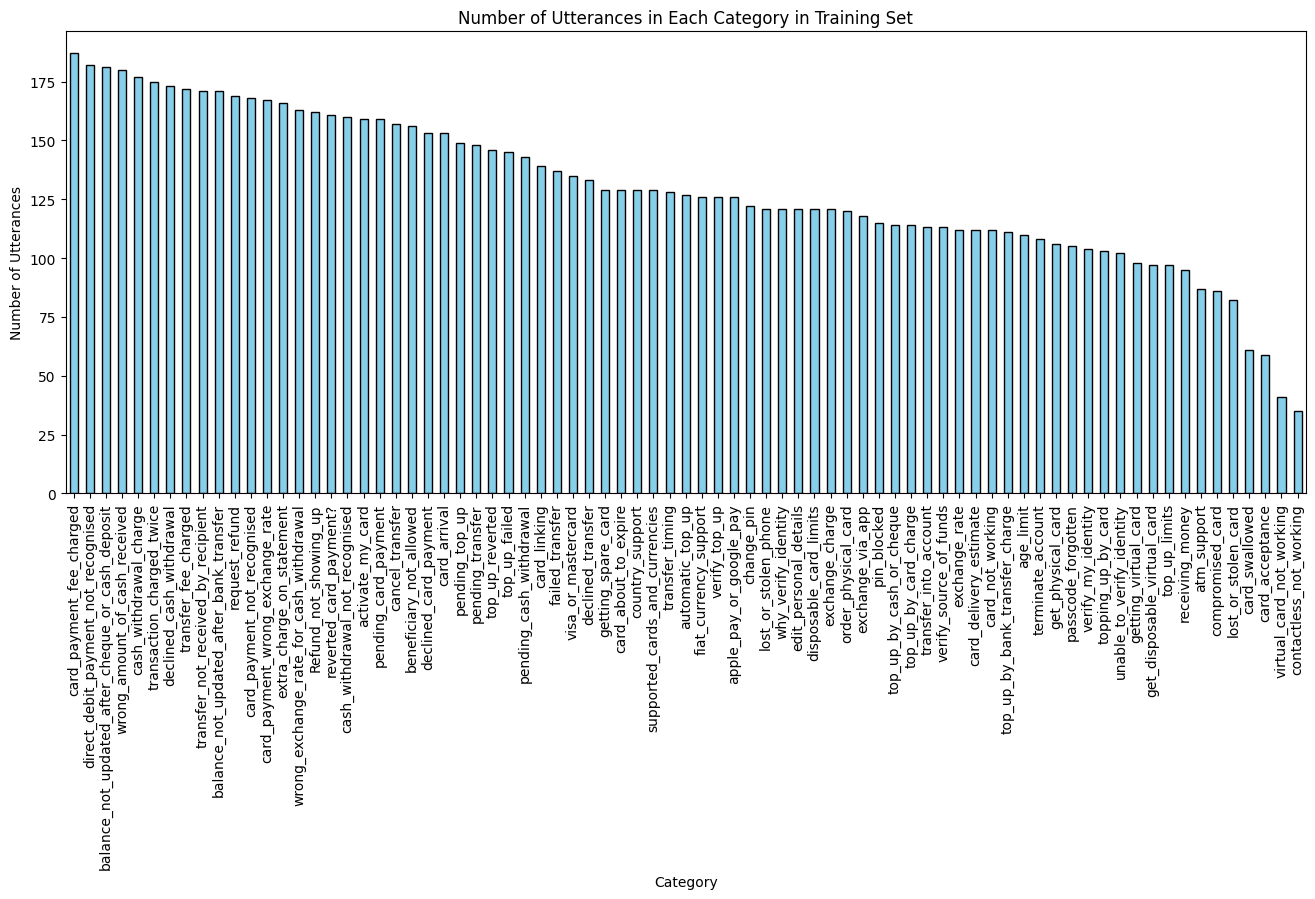

In [12]:
plt.figure(figsize=(16, 6))
unique_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=90)

# Set plot labels and title
plt.title('Number of Utterances in Each Category in Training Set')
plt.xlabel('Category')
plt.ylabel('Number of Utterances')

plt.show()

### Testing Data:

In [13]:
print("\033[1mNumber of Utterances in Testing Data:\033[0m",len(test_merged))

Number of Utterances in Testing Data: 3080


In [14]:
longest_utterance_test = max(test_merged['text'], key=len)
print("\033[1mThe Longest Utterance in the Test Set:\033[0m")
print(longest_utterance_test,"\n")
print("\033[1mLength of the Longest Utterance in Test Set:\033[0m", len(longest_utterance_test))

The Longest Utterance in the Test Set:
Hi,  Please help me, as i have transferred some amount but receiver did not get the same amount. He received a bit less. Due to this again i need to transfer the difference.   I have transferred money but beneficiary's account is credited with less amount. Now i have transfer the difference of the amount. I think there is some issue, could you please look into this. 

Length of the Longest Utterance in Test Set: 368


#### Unique Category Counts in the Test Data:

In [15]:
unique_count_test = test_merged['category'].value_counts()
most_used_category_test = unique_count_test.idxmax()
least_used_category_test = unique_count_test.idxmin()
print("\033[1mCategory with most utterances:\033[0m",most_used_category_test,"(",unique_count.loc[most_used_category_test]," utterances )")
print("\033[1mCategory with fewest utterances:\033[0m",least_used_category_test,"(",unique_count.loc[least_used_category_test]," utterances )")

Category with most utterances: card_arrival ( 153  utterances )
Category with fewest utterances: card_arrival ( 153  utterances )


#### Distribution of Category Counts in the Test Data:

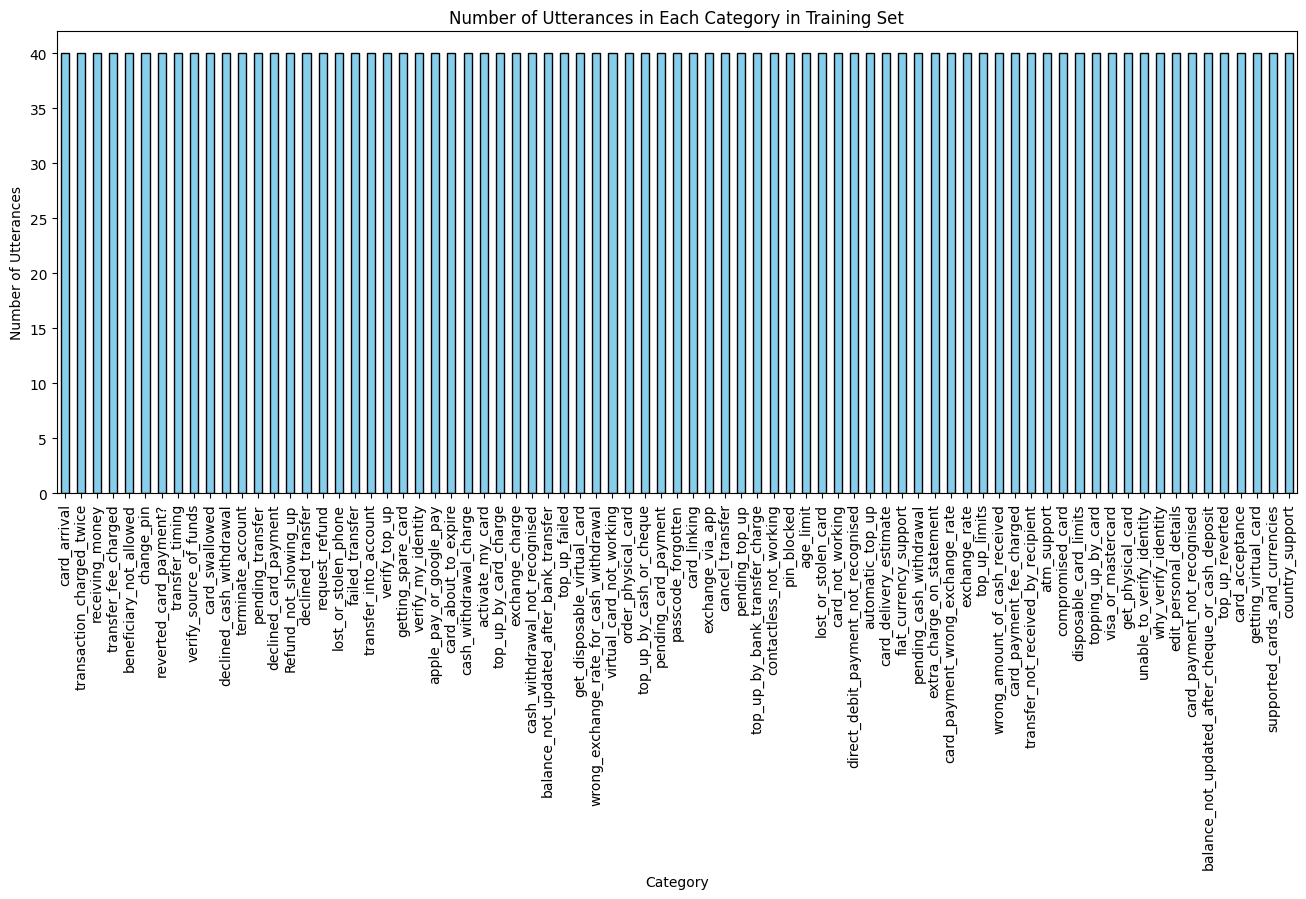

In [16]:
plt.figure(figsize=(16, 6))
unique_count_test.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=90)

# Set plot labels and title
plt.title('Number of Utterances in Each Category in Training Set')
plt.xlabel('Category')
plt.ylabel('Number of Utterances')

plt.show()

## Inference Code:

In [17]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
model_id = 'philschmid/BERT-Banking77'
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)
classifier = pipeline('text-classification', tokenizer=tokenizer, model=model)
classifier('What is the base of the exchange rates?')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/5.95k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

[{'label': 'exchange_rate', 'score': 0.9740924835205078}]

In [18]:
classifier('I need to order a new card since I just lost my old one')

[{'label': 'order_physical_card', 'score': 0.564785361289978}]

In [19]:
classifier('Someone stole my card and I need to order a new card.')

[{'label': 'lost_or_stolen_card', 'score': 0.8262631893157959}]